In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, utils
from torchvision.transforms import Resize, ToTensor, Normalize

In [2]:
train_path = './input/data/train/data.csv'

In [3]:
class Custom_Dataset(Dataset):
    def __init__(self, path, target, transforms, train=True):
        self.train = train
        self.path = path
        self.transform = transforms
        
        self.data = pd.read_csv(path, index_col=0)
        self.classes = np.sort(self.data[target].unique())
        
        self.y = self.data[target]
        self.X = []
        for path in self.data['path']:
            im = Image.open(path)
            self.X.append(im)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        X, y = self.X[idx], self.y[idx]
        if self.transform:
          X = self.transform(X)
        return X, torch.tensor(y, dtype=torch.long)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
gender_train_dataset = Custom_Dataset(path=train_path, target='gender', transforms=transform, train=True)
age_train_dataset = Custom_Dataset(path=train_path, target='age', transforms=transform, train=True)
mask_train_dataset = Custom_Dataset(path=train_path, target='mask', transforms=transform, train=True)

In [6]:
len(gender_train_dataset), len(age_train_dataset), len(mask_train_dataset)

(18900, 18900, 18900)

In [7]:
gender_train_dataset.classes, age_train_dataset.classes, mask_train_dataset.classes

(array([0., 1.]), array([0., 1., 2.]), array([0., 1., 2.]))

In [8]:
image, label = next(iter(gender_train_dataset))
image, label

<ipython-input-3-9c94a9f218b1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)
<ipython-input-3-9c94a9f218b1>:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)


(tensor([[[0.7373, 0.7373, 0.7373,  ..., 0.7686, 0.7686, 0.7686],
          [0.7373, 0.7373, 0.7373,  ..., 0.7686, 0.7686, 0.7686],
          [0.7373, 0.7373, 0.7373,  ..., 0.7686, 0.7686, 0.7686],
          ...,
          [0.2588, 0.2235, 0.1922,  ..., 0.5961, 0.6000, 0.6000],
          [0.2706, 0.2431, 0.2039,  ..., 0.6039, 0.6039, 0.6039],
          [0.2627, 0.2471, 0.2314,  ..., 0.6039, 0.6078, 0.6078]],
 
         [[0.7216, 0.7216, 0.7216,  ..., 0.7529, 0.7529, 0.7529],
          [0.7216, 0.7216, 0.7216,  ..., 0.7529, 0.7529, 0.7529],
          [0.7216, 0.7216, 0.7216,  ..., 0.7529, 0.7529, 0.7529],
          ...,
          [0.1529, 0.1216, 0.1020,  ..., 0.3725, 0.3765, 0.3765],
          [0.1686, 0.1412, 0.1176,  ..., 0.3804, 0.3804, 0.3804],
          [0.1608, 0.1569, 0.1451,  ..., 0.3804, 0.3843, 0.3843]],
 
         [[0.7098, 0.7098, 0.7098,  ..., 0.7412, 0.7412, 0.7412],
          [0.7098, 0.7098, 0.7098,  ..., 0.7412, 0.7412, 0.7412],
          [0.7098, 0.7098, 0.7098,  ...,

In [9]:
print(image.size())
image = image.permute(1,2,0)
print(image.size())

torch.Size([3, 512, 384])
torch.Size([512, 384, 3])


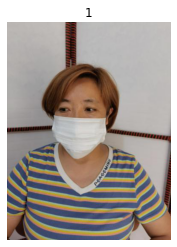

In [10]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.title("{}".format(label))
plt.axis('off')
plt.show()

In [11]:
gender_dataloader_train = DataLoader(gender_train_dataset, batch_size=16, shuffle=True, num_workers=4)
age_dataloader_train = DataLoader(age_train_dataset, batch_size=16, shuffle=True, num_workers=4)
mask_dataloader_train = DataLoader(mask_train_dataset, batch_size=16, shuffle=True, num_workers=4)


In [12]:
images, labels = next(iter(gender_dataloader_train))

<ipython-input-3-9c94a9f218b1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)
<ipython-input-3-9c94a9f218b1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)
<ipython-input-3-9c94a9f218b1>:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)
<ipython-input-3-9c94a9f218b1>:23: DeprecationWarning: an integer is required (got

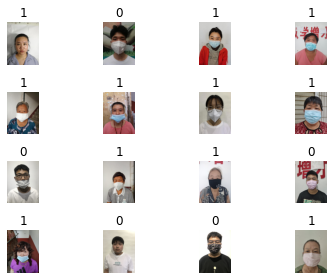

In [13]:
for n, (image, label) in enumerate(zip(images, labels), start=1):
    plt.subplot(4,4,n)
    image = image.permute(1,2,0)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title("{}".format(label))
    plt.axis('off')
plt.tight_layout()
plt.show()